In [1]:
import sys
sys.path.append("..")
import GradientMethods.models as models
import GradientMethods.action_value_methods as avm
import utils
import gymnasium as gym
import torch
import random

# Settings

In [2]:
ENVIRONMENT_ID = "CartPole-v1"
NUM_EPISODES = 10000
GRAD_CLIP_VALUE = 100
GAMMA = 0.9
EPS_START = 1
EPS_END = 0.01
NN_HIDDEN_LAYER_SIZES = [8, 4]
RNG_SEED = 7
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print("PyTorch device:", device)
torch.manual_seed(RNG_SEED)
random.seed(RNG_SEED)

PyTorch device: cpu


# Linear model

Average return per episode: 23.1767


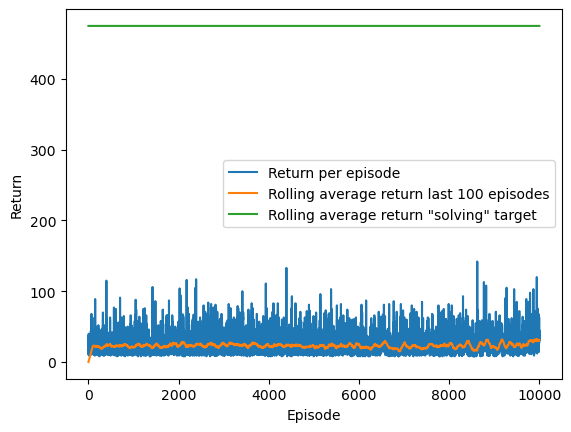

In [3]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = torch.nn.Linear(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()
returns = avm.train_episodic_semi_grad_sarsa(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns, env.spec.reward_threshold)

# Neural network model

Average return per episode: 71.5092


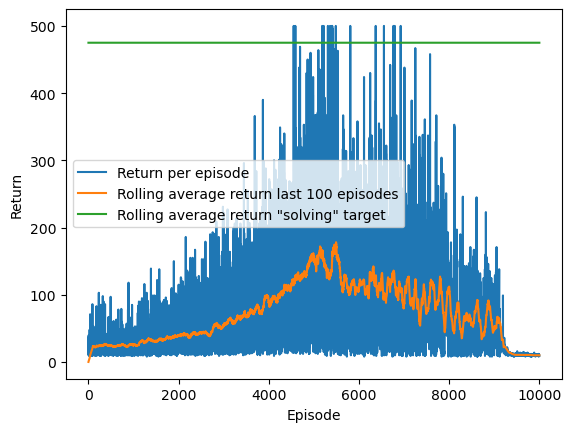

In [4]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = models.create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = torch.nn.MSELoss()
returns = avm.train_episodic_semi_grad_sarsa(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns, env.spec.reward_threshold)